In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/ANN2DL/homework2/Alberto

Mounted at /gdrive
/gdrive/MyDrive/ANN2DL/homework2/Alberto


In [2]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [3]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.15.0


In [4]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from datetime import datetime
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.tsa.seasonal import seasonal_decompose


# Load data

In [5]:
# dataset_dir = 'dataset'
dataset_dir = 'data'

In [6]:
dataset = np.load(f'{dataset_dir}/training_data.npy')
df = pd.DataFrame(dataset)
df.shape

(48000, 2776)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2766,2767,2768,2769,2770,2771,2772,2773,2774,2775
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.478704,0.412963,0.501852,0.756481,0.744444,0.640741,0.516667,0.602778,0.367593,0.331481
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.628000,0.624000,0.644000,0.688000,0.740000,0.640000,0.536000,0.600000,0.460000,0.396000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.959741,0.949098,0.919297,0.916705,0.901249,0.932531,0.955206,0.960481,0.946506,0.977140
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.411765,0.307030,0.325681,0.361549,0.430416,0.486370,0.450502,0.470588,0.569584,0.571019
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.340909,0.522727,0.568182,0.772727,0.681818,0.704545,0.863636,0.727273,0.818182,0.840909


In [8]:
valid_periods = np.load(f'{dataset_dir}/valid_periods.npy')
valid_periods.shape

(48000, 2)

In [9]:
categories = np.load(f'{dataset_dir}/categories.npy')
categories_df = pd.DataFrame(categories, columns=['category'])
categories.shape

(48000,)

In [11]:
categories[categories=='A'].shape

(5728,)

In [ ]:
dataset.shape

(48000, 2776)

In [ ]:
x_train = dataset[:, :2767]
y_train = dataset[:, 2767:]

In [ ]:
x_train.shape, y_train.shape

((48000, 2767), (48000, 9))

In [ ]:
dataset[0]

array([0.        , 0.        , 0.        , ..., 0.60277778, 0.36759259,
       0.33148148])

In [ ]:
dataset[0].shape[0]

2776

In [ ]:
dataset[0].shape

(2776,)

In [ ]:
np.random.normal(0,0.005,1)

array([0.0008376])

In [ ]:
arr = dataset[0] + 3

In [ ]:
print(np.std(dataset[0]))

0.14071068885071855


In [ ]:
def add_white_noise(signal,noise_factor):
  noise = np.random.normal(0,signal.std(),signal.size)
  augmented_signal = signal + noise * noise_factor
  return augmented_signal

In [ ]:
from scipy.interpolate import CubicSpline

def jitter(x, sigma=0.03):
    # https://arxiv.org/pdf/1706.00527.pdf
    return x + np.random.normal(loc=0., scale=sigma, size=x.shape[0])

def scaling(x, sigma=0.1):
    # https://arxiv.org/pdf/1706.00527.pdf
    factor = np.random.normal(loc=1., scale=sigma, size=x.shape[0])
    return np.multiply(x, factor)

In [ ]:
def augment(X, y):
  X_with_augs = np.array(X, copy=True)
  #y_with_augs = np.array(y, copy=True)
  for aug in [(jitter, 0.01), (jitter, 0.02), (jitter, 0.03), (scaling, 0.1), (magnitude_warping, 0.15)]:
    X_aug = aug[0](X, aug[1])
    X_with_augs = np.append(X_with_augs, X_aug, axis=0)

    # Appending the labels of the augmented samples to the labels in the train set
    y_with_augs = np.append(y_with_augs, y, axis=0)
  return X_with_augs#, y_with_augs

In [ ]:
dataset[0], categories[0]

(array([0.        , 0.        , 0.        , ..., 0.60277778, 0.36759259,
        0.33148148]),
 'D')

In [ ]:
x_0 = jitter(dataset[0],0.01)

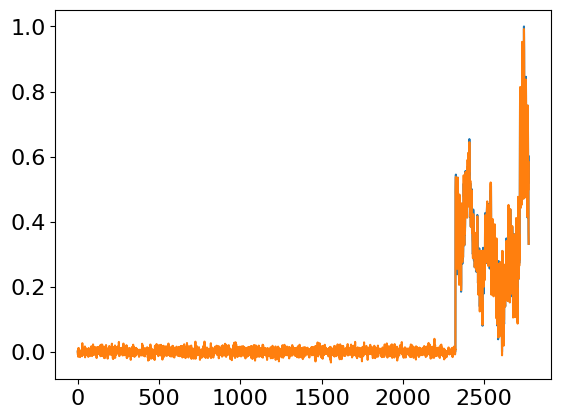

In [ ]:
plt.plot(dataset[0])
plt.plot(x_0)

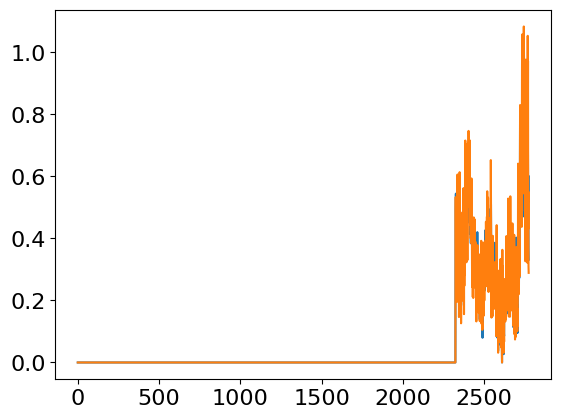

In [ ]:
x_1 = scaling(dataset[0],0.2)

plt.plot(dataset[0])
plt.plot(x_1)

In [ ]:
np.vstack((x_0, x_1))

(2, 2776)

In [ ]:
print(dataset[categories == 'A'].shape)

(5728, 2776)


In [ ]:
print(dataset[categories == 'F'].shape)

(277, 2776)


In [ ]:
def augment(X, y):
  X_with_augs = np.array(X, copy=True)
  #y_with_augs = np.array(y, copy=True)
  for aug in [(jitter, 0.01), (jitter, 0.02), (jitter, 0.03), (scaling, 0.1)]:
    X_aug = aug[0](X, aug[1])
    X_with_augs = np.append(X_with_augs, X_aug, axis=0)

    # Appending the labels of the augmented samples to the labels in the train set
    y_with_augs = np.append(y_with_augs, y, axis=0)
  return X_with_augs#, y_with_augs

In [ ]:
A_dataset = dataset[categories == 'A']
F_dataset = dataset[categories == 'F']
A_cat = categories[categories == 'A']
F_cat = categories[categories == 'F']

In [ ]:
def augment_A(X,cat,valid_data):
  X_augmented = np.array(X,copy=True)
  cat_augmented = np.array(cat,copy=True)
  valid_augmented = np.array(valid_data,copy=True)

  for i in range(len(X)):
    if (i%2 == 0):
      timeSerie_augmented = jitter(X[i],0.02)
      X_augmented = np.vstack((X_augmented, timeSerie_augmented))
    else:
      timeSerie_augmented = scaling(X[i],0.01)
      X_augmented = np.vstack((X_augmented, timeSerie_augmented))

    valid_augmented = np.vstack((valid_augmented,valid_data[i]))
    cat_augmented = np.append(cat_augmented,'A')


  return X_augmented, cat_augmented, valid_augmented

In [ ]:
A_augmented , cat_A_augmented = augment_A(A_dataset,A_cat)

Output streaming troncato alle ultime 5000 righe.
time Serie number 728
time Serie number 729
time Serie number 730
time Serie number 731
time Serie number 732
time Serie number 733
time Serie number 734
time Serie number 735
time Serie number 736
time Serie number 737
time Serie number 738
time Serie number 739
time Serie number 740
time Serie number 741
time Serie number 742
time Serie number 743
time Serie number 744
time Serie number 745
time Serie number 746
time Serie number 747
time Serie number 748
time Serie number 749
time Serie number 750
time Serie number 751
time Serie number 752
time Serie number 753
time Serie number 754
time Serie number 755
time Serie number 756
time Serie number 757
time Serie number 758
time Serie number 759
time Serie number 760
time Serie number 761
time Serie number 762
time Serie number 763
time Serie number 764
time Serie number 765
time Serie number 766
time Serie number 767
time Serie number 768
time Serie number 769
time Serie number 770
time

In [ ]:
A_augmented.shape , cat_A_augmented.shape

((11456, 2776), (11456,))

In [ ]:
#np.save('data/A_augmented.npy',A_augmented)
np.save('data/cat_A_augmented.npy',cat_A_augmented)

In [ ]:
def augment_F(X,cat,valid_data):
  X_augmented = np.array(X,copy=True)
  cat_augmented = np.array(cat,copy=True)
  valid_augmented = np.array(valid_data,copy=True)

  for i in range(len(X)):
    for aug in [(jitter, 0.01), (jitter, 0.02), (jitter, 0.03), (scaling, 0.1), (scaling, 0.2)]:
      timeSerie_augmented = aug[0](X[i],aug[1])
      X_augmented = np.vstack((X_augmented, timeSerie_augmented))
      valid_augmented = np.vstack((valid_augmented,valid_data[i]))
      cat_augmented = np.append(cat_augmented,'F')

  return X_augmented, cat_augmented, valid_augmented

In [ ]:
F_augmented , cat_F_augmented = augment_F(F_dataset,F_cat)

time Serie number 0
time Serie number 1
time Serie number 2
time Serie number 3
time Serie number 4
time Serie number 5
time Serie number 6
time Serie number 7
time Serie number 8
time Serie number 9
time Serie number 10
time Serie number 11
time Serie number 12
time Serie number 13
time Serie number 14
time Serie number 15
time Serie number 16
time Serie number 17
time Serie number 18
time Serie number 19
time Serie number 20
time Serie number 21
time Serie number 22
time Serie number 23
time Serie number 24
time Serie number 25
time Serie number 26
time Serie number 27
time Serie number 28
time Serie number 29
time Serie number 30
time Serie number 31
time Serie number 32
time Serie number 33
time Serie number 34
time Serie number 35
time Serie number 36
time Serie number 37
time Serie number 38
time Serie number 39
time Serie number 40
time Serie number 41
time Serie number 42
time Serie number 43
time Serie number 44
time Serie number 45
time Serie number 46
time Serie number 47
ti

In [ ]:
F_augmented.shape

(1662, 2776)

In [ ]:
np.save('data/F_augmented.npy',F_augmented)
np.save('data/cat_F_augmented.npy',cat_F_augmented)